<a href="https://colab.research.google.com/github/AkashKoley012/Deep-Learning-Projects/blob/main/Face%20Mask%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Download & Extract

In [1]:
!kaggle datasets download -d andrewmvd/face-mask-detection

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
License(s): CC0-1.0
 99% 392M/398M [00:04<00:00, 95.8MB/s]
100% 398M/398M [00:04<00:00, 87.3MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Importing Libraries

In [3]:
!pip install xmltodict

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import xmltodict
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models

# Extraction of Images and Annotations

In [5]:
dict_cls = {'with_mask': 0, 'without_mask': 1, 'mask_weared_incorrect': 2}

In [6]:
images = []
labels = []

for file in os.listdir('/content/images'):
  img = cv2.imread(os.path.join('/content/images', file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)

  content = open(os.path.join('/content/annotations', file.replace('png', 'xml'))).read()
  content = xmltodict.parse(content)['annotation']['object']

  if not isinstance(content, list):
    content = [content]

  label = []
  for obj in content:
    temp = (dict_cls[obj['name']], int(obj['bndbox']['xmin']), int(obj['bndbox']['ymin']), int(obj['bndbox']['xmax']), int(obj['bndbox']['ymax']))
    label.append(temp)

  labels.append(label)

array([[[ 4,  7,  3],
        [ 3,  7,  3],
        [ 4,  8,  3],
        ...,
        [ 6,  7,  4],
        [17,  7,  4],
        [69, 46, 42]],

       [[ 4,  7,  3],
        [ 3,  7,  3],
        [ 4,  8,  3],
        ...,
        [ 6,  7,  4],
        [17,  7,  4],
        [69, 46, 42]],

       [[ 5,  9,  4],
        [ 5,  8,  4],
        [ 5,  9,  4],
        ...,
        [ 6,  8,  4],
        [17,  7,  3],
        [64, 41, 39]],

       ...,

       [[24, 25, 21],
        [22, 22, 20],
        [24, 24, 23],
        ...,
        [48, 58, 52],
        [48, 61, 56],
        [41, 55, 51]],

       [[23, 24, 20],
        [22, 23, 20],
        [24, 24, 23],
        ...,
        [45, 53, 47],
        [51, 60, 56],
        [44, 53, 49]],

       [[24, 24, 20],
        [22, 23, 21],
        [23, 23, 23],
        ...,
        [31, 37, 32],
        [26, 32, 27],
        [17, 23, 18]]], dtype=uint8)
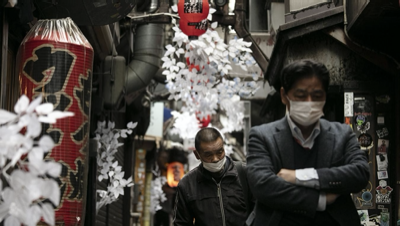

In [7]:
images[1]

In [8]:
labels[1]

[(2, 202, 145, 228, 174), (0, 289, 86, 327, 127)]

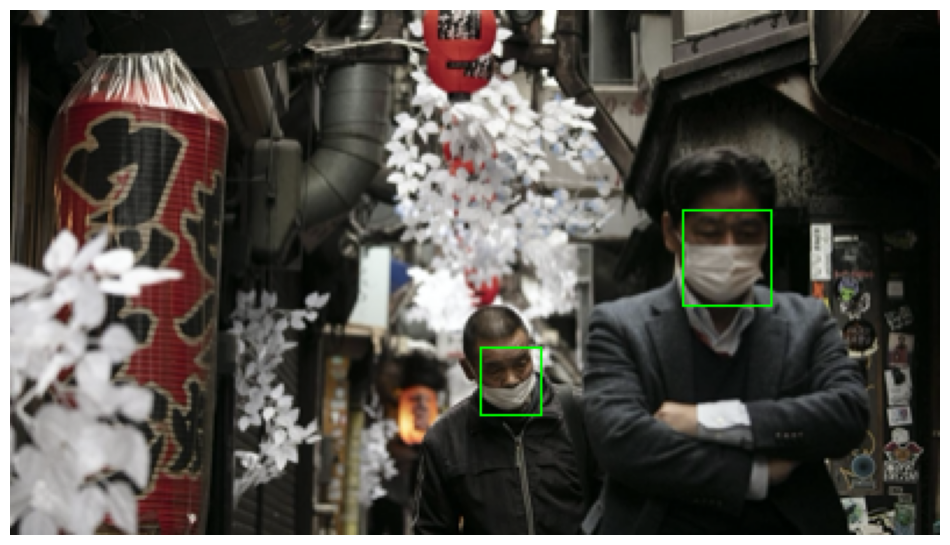

In [9]:
image = images[1].copy()

for (c,x,y,w,h) in labels[1]:
  cv2.rectangle(image, (x,y), (w,h), (0,255,0), 1)

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(image)

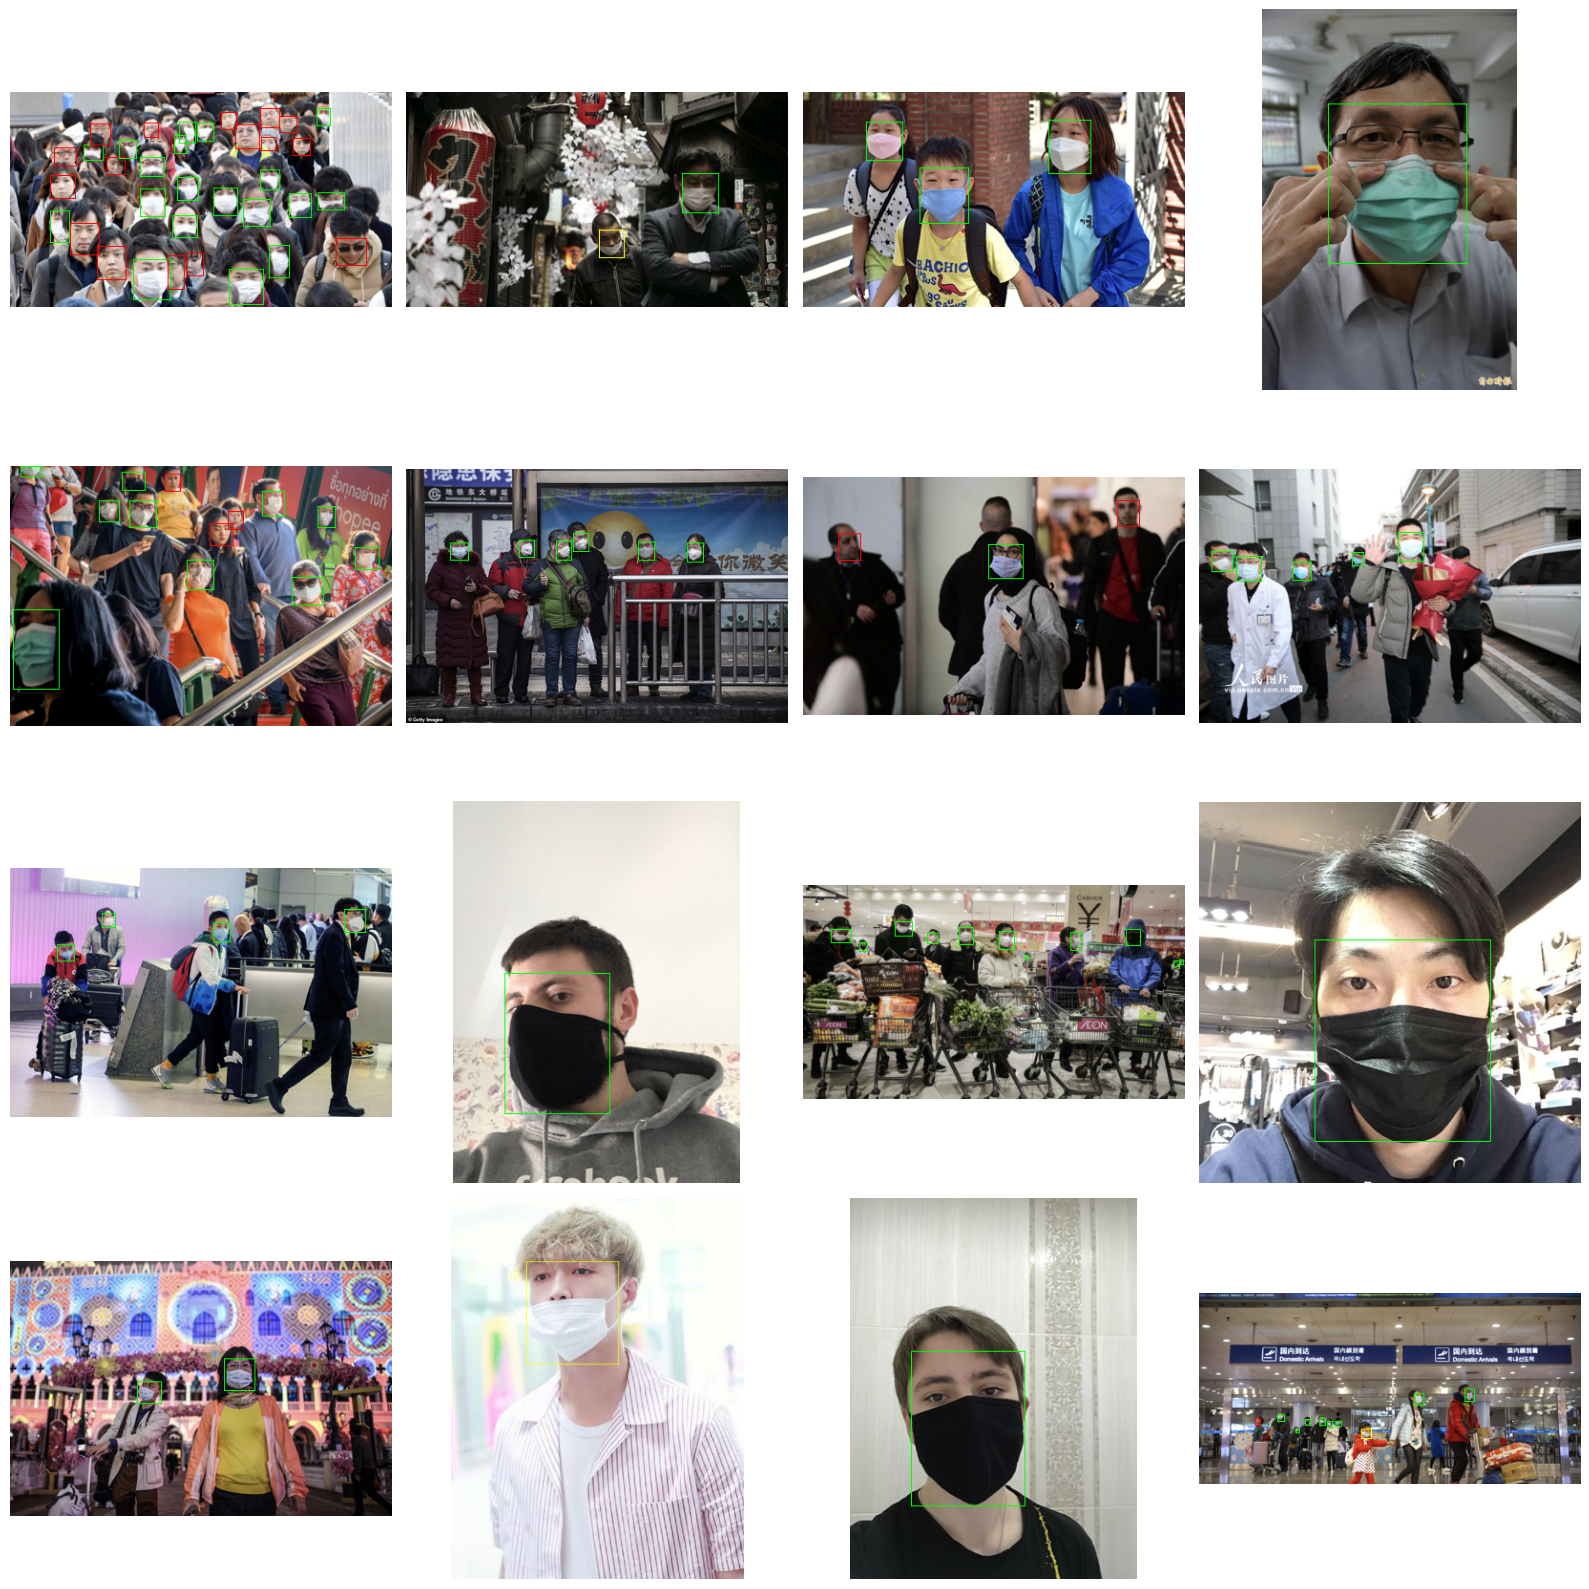

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, ax in enumerate(axes.flat):

    image = images[i].copy()

    for (c,x,y,w,h) in labels[i]:

      if c == 0:
        cv2.rectangle(image, (x,y), (w,h), (0,255,0), 1)
      elif c == 1:
        cv2.rectangle(image, (x,y), (w,h), (255,0,0), 1)
      else:
        cv2.rectangle(image, (x,y), (w,h), (255,255,0), 1)

    ax.axis('off')
    ax.imshow(image)

plt.tight_layout()
plt.show()

In [11]:
path = '/content/annotations'

for file in os.listdir(path):

  content = open(os.path.join(path, file)).read()
  content = xmltodict.parse(content)
  content = content['annotation']
  print(content)
  break



{'folder': 'images', 'filename': 'maksssksksss149.png', 'size': {'width': '400', 'height': '283', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '38', 'ymin': '98', 'xmax': '71', 'ymax': '130'}}, {'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '180', 'ymin': '103', 'xmax': '215', 'ymax': '136'}}, {'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '287', 'ymin': '53', 'xmax': '315', 'ymax': '85'}}, {'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '315', 'ymin': '57', 'xmax': '341', 'ymax': '89'}}, {'name': 'with_mask', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'difficult': '0', 'bndbox': {'xmin': '330', 'ymin': '104', 'xmax': '359', 'ymax': '133'}}, {'name': '

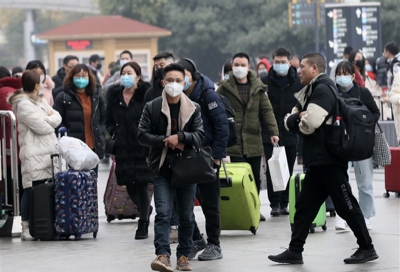

In [12]:
# Load the image correctly
image_path = "/content/images/maksssksksss12.png"

# Load the image
image = cv2.imread(image_path)  # Replace with your image path

# Import the necessary function
from google.colab.patches import cv2_imshow

# Show the image using cv2_imshow
cv2_imshow(image)
# cv2.waitKey(0)  # Wait for a key press - not needed in Colab
# cv2.destroyAllWindows()  # Close the window - not needed in Colab

# Image Preprocessing

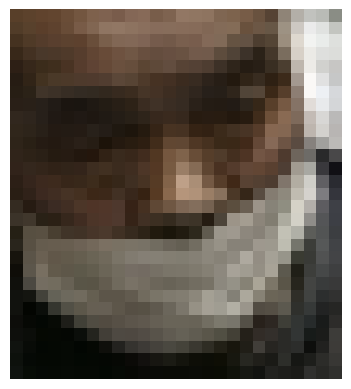

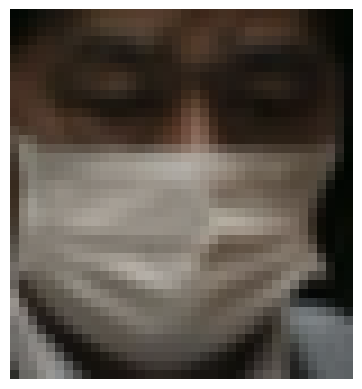

In [13]:
image = Image.fromarray(images[1])
for bbox in labels[1]:
  img = image.crop(bbox[1:])
  plt.axis('off')
  plt.imshow(img)
  plt.show()


In [14]:
(1,2,3,4,5)[1:]

(2, 3, 4, 5)

In [15]:
for bbox in labels[1]:
  img = image.crop(bbox[1:])
  print(img)

<PIL.Image.Image image mode=RGB size=26x29 at 0x7F0A15A75D10>
<PIL.Image.Image image mode=RGB size=38x41 at 0x7F0A175FA010>


In [16]:
len(images), len(labels)

(853, 853)

In [17]:
X = []
y = []

for i in range(len(images)):
  image = Image.fromarray(images[i])
  for bbox in labels[i]:
    img = image.crop(bbox[1:])
    img = np.array(img)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    X.append(img)
    y.append(bbox[0])


In [18]:
X[0].shape

(224, 224, 3)

In [19]:
y[0]

1

In [20]:
split = (int)(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Dataset & DataLoader

In [21]:
class DetectionDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [22]:
train_dataset = DetectionDataset(X_train, y_train)
test_dataset = DetectionDataset(X_test, y_test)

In [23]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [24]:
for i in train_dataloader:
  print(i)
  break

[tensor([[[[0.4000, 0.3412, 0.2588],
          [0.4000, 0.3412, 0.2588],
          [0.4000, 0.3412, 0.2588],
          ...,
          [0.3373, 0.2431, 0.1608],
          [0.3373, 0.2431, 0.1608],
          [0.3373, 0.2431, 0.1608]],

         [[0.4000, 0.3412, 0.2588],
          [0.4000, 0.3412, 0.2588],
          [0.4000, 0.3412, 0.2588],
          ...,
          [0.3373, 0.2431, 0.1608],
          [0.3373, 0.2431, 0.1608],
          [0.3373, 0.2431, 0.1608]],

         [[0.4000, 0.3412, 0.2588],
          [0.4000, 0.3412, 0.2588],
          [0.4000, 0.3412, 0.2588],
          ...,
          [0.3373, 0.2431, 0.1608],
          [0.3373, 0.2431, 0.1608],
          [0.3373, 0.2431, 0.1608]],

         ...,

         [[0.4078, 0.4353, 0.3725],
          [0.4078, 0.4353, 0.3725],
          [0.4078, 0.4353, 0.3725],
          ...,
          [0.1882, 0.1843, 0.1725],
          [0.1882, 0.1843, 0.1725],
          [0.1882, 0.1843, 0.1725]],

         [[0.4078, 0.4353, 0.3725],
          [0.407

# resnet34 model

In [25]:
model = models.resnet34(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 132MB/s]


In [26]:
for param in model.parameters():
    param.requires_grad=False

In [27]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [29]:
model.fc = nn.Linear(model.fc.in_features, 3)

In [30]:
model.fc

Linear(in_features=512, out_features=3, bias=True)

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [32]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [33]:
for child in model.children():
  for param in child.parameters():
    if param.requires_grad:
      print(child)
    # param.requires_grad = False

Linear(in_features=512, out_features=3, bias=True)
Linear(in_features=512, out_features=3, bias=True)


In [34]:
for i, (inputs, labels) in enumerate(train_dataloader):
  print(inputs.shape, labels.shape)
  break

torch.Size([64, 224, 224, 3]) torch.Size([64])


In [35]:
epochs = 10

for epoch in range(epochs):

  total_epoch_loss = 0

  for i, (inputs, labels) in enumerate(train_dataloader):
    if torch.cuda.is_available():
      inputs , labels = inputs.cuda(), labels.cuda()

    # Reshape the inputs to have the correct channel order [batch_size, channels, height, width]
    inputs = inputs.permute(0, 3, 1, 2)

    # Convert the inputs to float32
    inputs = inputs.type(torch.cuda.FloatTensor) # This line is added to change the data type`

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss / len(train_dataloader)
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.36005014181137085
Epoch: 2, Loss: 0.4663838744163513
Epoch: 3, Loss: 0.31965339183807373
Epoch: 4, Loss: 0.32160550355911255
Epoch: 5, Loss: 0.3351689577102661
Epoch: 6, Loss: 0.20305627584457397
Epoch: 7, Loss: 0.13108141720294952
Epoch: 8, Loss: 0.16255812346935272
Epoch: 9, Loss: 0.23091082274913788
Epoch: 10, Loss: 0.27220165729522705


In [41]:
cap = cv2.VideoCapture(1)

while True:
  ret, frame = cap.read()
  print(ret,frame)
  break
#   cv2_imshow(frame)
#   if cv2.waitKey(1) & 0xFF == ord('x'):
#     break
# cv2.destroyAllWindows()

False None


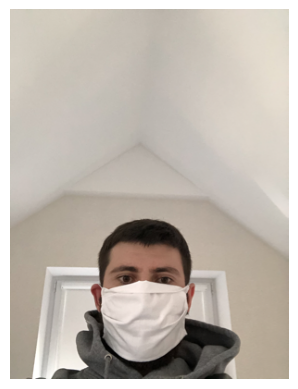

In [47]:
img = '/content/images/maksssksksss10.png'

img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

tensor([[ 2.4259, -1.2275, -1.7436]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

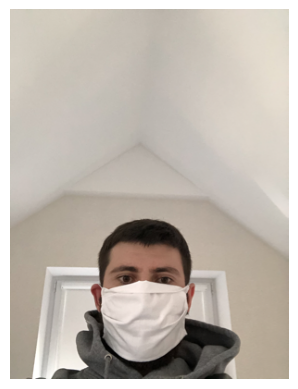

In [54]:
img = '/content/images/maksssksksss10.png'

img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

# Resize the image to the desired dimensions
img = cv2.resize(img, (224, 224))

# Normalize the image
img = img / 255.0

# Reshape the image for the model
# img = img.reshape(1, 224, 224, 3)  # Incorrect reshape
img = img.transpose(2, 0, 1)  # Transpose to get channels first
img = img.reshape(1, 3, 224, 224) # Reshape to the correct format [batch_size, channels, height, width]


# Convert the NumPy array to a PyTorch tensor
img = torch.from_numpy(img).float() # Convert to PyTorch tensor and ensure it's float32

# Move the tensor to the appropriate device (GPU if available)
img = img.to(device)

# Make predictions
output = model(img)
output

# Evaluation

In [55]:
 # Set model to eval model
 model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [57]:
# evaluation on test
total = 0
correct = 0

with torch.no_grad():
  for i, (inputs, labels) in enumerate(test_dataloader):
    if torch.cuda.is_available():
      inputs , labels = inputs.cuda(), labels.cuda()

    # Reshape the inputs to have the correct channel order [batch_size, channels, height, width]
    inputs = inputs.permute(0, 3, 1, 2)

    # Convert the inputs to float32
    inputs = inputs.type(torch.cuda.FloatTensor) # This line is added to change the data type`

    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 0.9079754601226994


In [58]:
# evaluation on train
total = 0
correct = 0

with torch.no_grad():
  for i, (inputs, labels) in enumerate(train_dataloader):
    if torch.cuda.is_available():
      inputs , labels = inputs.cuda(), labels.cuda()

    # Reshape the inputs to have the correct channel order [batch_size, channels, height, width]
    inputs = inputs.permute(0, 3, 1, 2)

    # Convert the inputs to float32
    inputs = inputs.type(torch.cuda.FloatTensor) # This line is added to change the data type`

    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 0.9241633404973902
